In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imblearn
!pip install joblib

In [3]:
!nvidia-smi

Sun Aug 20 21:52:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
import time

def get_gpu_usage():
    result = os.popen('nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits').read()
    return float(result)

num_samples = 10
total_gpu_usage = 0

for _ in range(num_samples):
    gpu_usage = get_gpu_usage()
    total_gpu_usage += gpu_usage
    time.sleep(1)  # Wait for 1 second between samples

average_gpu_usage = total_gpu_usage / num_samples
print(f"Average GPU Usage: {average_gpu_usage}%")

Average GPU Usage: 0.0%


<ipython-input-10-0431c51f0fc3>:5: DtypeWarning: Columns (16,54,55,56,57,58,59,60,61,62,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,136,137,138,139,140,141,142,143,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,163,164,165,166,167,168,169,170,172,173,174,175,176,177,178,179,181,182,183,184,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,217,218,219,220,221,222,223,224,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,261,262,263,264,265,266,267,268,269,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,342,343,344,345,346,347,348,349,350,352,353,354,355,356,357,358,359,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,379,380,381,382,383,384,385,386,388,389,390,391,392,393,394,395,397,398,399,400,401,402,403,404,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,4

(747, 299)
Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.8743718592964824
- MCC: 0.7489383432511472


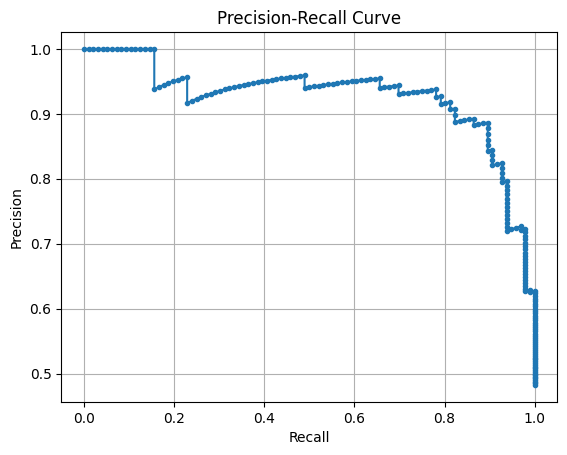

----------------------------------
Adjusted Confusion Matrix:
[[94  9]
 [17 79]]
----------------------------------
Adjusted Precision: 0.8468468468468469
Adjusted Sensitivity (Recall): 0.912621359223301
Adjusted Specificity: 0.8229166666666666
Adjusted F1-Score: 0.8785046728971962


In [10]:
# df = df.drop(columns=['isomeric_smiles'])
import time
import pandas as pd
start_time = time.time()
df = pd.read_csv('drive/MyDrive/final_Desc_f.csv')
df = df.drop(columns=['isomeric_smiles', 'Unnamed: 0'])
Y = df['Y']
X = df.drop(['Y'],axis=1)
X

for column in X.columns:
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)
    elif pd.api.types.is_numeric_dtype(df[column]):
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)
    else:
        df[column] = 0.0

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(method='spearman')['Y']

sorted_correlations = correlation.abs().sort_values(ascending=False)

top_n = 300
top_correlations = sorted_correlations[:top_n]

top_correlations
selected_features = sorted_correlations.index[:top_n]
X_new = df[selected_features]

X_new = X_new.drop(columns = ['Y'])
X_new

print(X_new.shape)
X1 = X_new

output_file = 'Efficacy_Model.txt'

# Write column names to the text file
with open(output_file, 'w') as file:
    file.write('\t'.join(X_new.columns))

# Standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

# we can't do log transformation because there are some values that we need which are negative

X1 = (X1 - X1.mean())/X1.std()

scaler = RobustScaler()
X1 = scaler.fit_transform(X1)

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE(sampling_strategy='minority', random_state=42)
X1, Y = smote.fit_resample(X1, Y)
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,test_size=0.2)

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix

# Define and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

dt = DecisionTreeClassifier(max_depth=5)

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

svm_rbf = SVC(gamma=2, C=1)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, Y_train)

y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)


stack_model_train_accuracy = accuracy_score(Y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(Y_train, y_train_pred)
# stack_model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted')


stack_model_test_accuracy = accuracy_score(Y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(Y_test, y_test_pred)
# stack_model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
cm = confusion_matrix(Y_test, y_test_pred)
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
# print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the predicted probabilities or decision values from your classifier
predicted_probs = stack_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, predicted_probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# Adjust the decision threshold
new_threshold = 0.55  # You can adjust this value
adjusted_predictions = (stack_model.predict_proba(X_test)[:, 1] >= new_threshold).astype(int)

# Calculate the new confusion matrix and metrics
new_cm = confusion_matrix(Y_test, adjusted_predictions)
new_TP = new_cm[0, 0]
new_FN = new_cm[0, 1]
new_FP = new_cm[1, 0]
new_TN = new_cm[1, 1]

new_precision = new_TP / (new_TP + new_FP)
new_sensitivity = new_TP / (new_TP + new_FN)
new_specificity = new_TN / (new_TN + new_FP)
new_f1_score = 2 * new_TP / (2 * new_TP + new_FP + new_FN)

print('----------------------------------')
print('Adjusted Confusion Matrix:')
print(new_cm)
print('----------------------------------')
print('Adjusted Precision:', new_precision)
print('Adjusted Sensitivity (Recall):', new_sensitivity)
print('Adjusted Specificity:', new_specificity)
print('Adjusted F1-Score:', new_f1_score)

# Plot the confusion matrix using seaborn
# classes = np.unique(true_labels)
# sns.heatmap(new_cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Assuming you have the predicted labels and true labels
# predicted_labels = stack_model.predict(X_test)
# true_labels = Y_test

# # Calculate the confusion matrix
# cm = confusion_matrix(true_labels, predicted_labels)

# # Plot the confusion matrix using seaborn
# classes = np.unique(true_labels)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [11]:
end_time = time.time()

In [12]:
average_ram_usage = 2000
average_gpu_usage= 0
exec_time = end_time-start_time
memory_cost_gb = 0.1
cpu_cost_hr = 0.5

memory_usage = (average_ram_usage/1024)*(exec_time/3600)
cpu_usage = average_gpu_usage * (exec_time/3600)

total_mem = memory_cost_gb*memory_usage
total_gpu = cpu_cost_hr*cpu_usage

total = total_mem+total_gpu
print(total)

0.001885302610591882


In [114]:
import joblib
model_filename = f'Efficacy_Model.joblib'
joblib.dump(stack_model, model_filename)

print("Model saved to", model_filename)

Model saved to Efficacy_Model.joblib


In [58]:
print(cm)
print(y_test_pred)

[[15 41]
 [11 83]]
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1]


In [42]:
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * TP / (2 * TP + FP + FN)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1-Score:", f1_score)

new_threshold = 0.3  # You can adjust this value
adjusted_predictions = (stack_model.predict_proba(X_test)[:, 1] >= new_threshold).astype(int)
print(adjusted_predictions)
print(y_test_pred)
# Calculate the new confusion matrix and metrics
new_cm = confusion_matrix(Y_test, adjusted_predictions)
print(new_cm)
new_TP = new_cm[0, 0]
new_FN = new_cm[0, 1]
new_FP = new_cm[1, 0]
new_TN = new_cm[1, 1]

new_precision = new_TP / (new_TP + new_FP)
new_sensitivity = new_TP / (new_TP + new_FN)
new_specificity = new_TN / (new_TN + new_FP)
new_f1_score = 2 * new_TP / (2 * new_TP + new_FP + new_FN)

print('----------------------------------')
print('Adjusted Confusion Matrix:')
print(new_cm)
print('----------------------------------')
print('Adjusted Precision:', new_precision)
print('Adjusted Sensitivity (Recall):', new_sensitivity)
print('Adjusted Specificity:', new_specificity)
print('Adjusted F1-Score:', new_f1_score)


Sensitivity (Recall): 0.2549019607843137
Specificity: 0.9696969696969697
Precision: 0.8125
F1-Score: 0.3880597014925373
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1]
[[ 0 51]
 [ 0 99]]
----------------------------------
Adjusted Confusion Matrix:
[[ 0 51]
 [ 0 99]]
----------------------------------
Adjusted Precision: nan
Adjusted Sensitivity (Recall): 0.0
Adjusted Specificity: 1.0
Adjusted F1-Score: 0.0


<ipython-input-42-392955cff7a9>:28: RuntimeWarning: invalid value encountered in long_scalars
  new_precision = new_TP / (new_TP + new_FP)


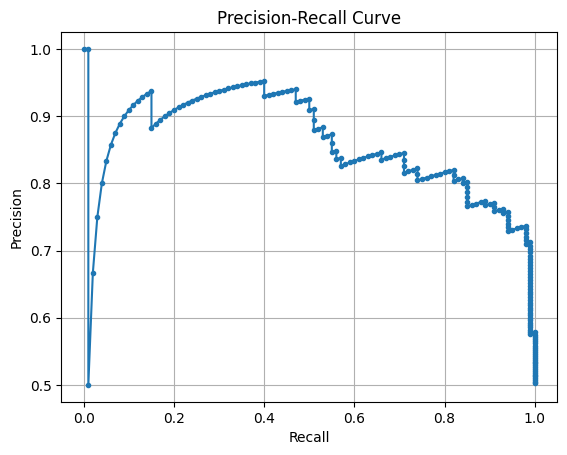

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the predicted probabilities or decision values from your classifier
predicted_probs = stack_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, predicted_probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()



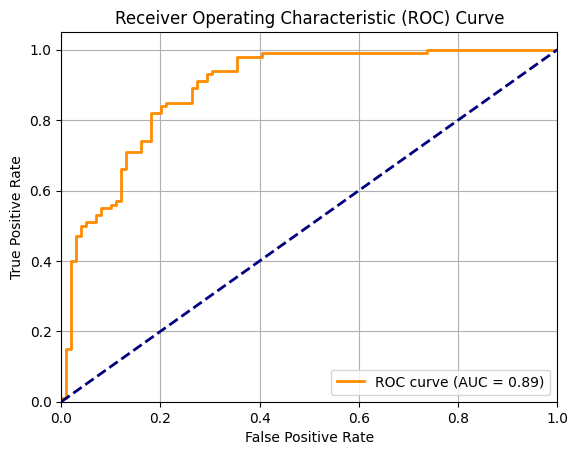

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the predicted probabilities or decision values from your classifier
predicted_probs = stack_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

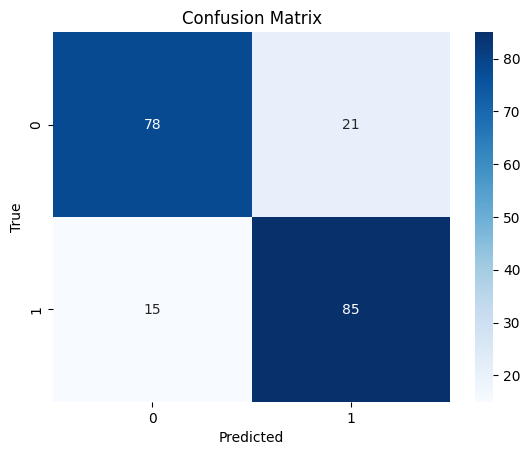

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the predicted labels and true labels
predicted_labels = stack_model.predict(X_test)
true_labels = Y_test

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
classes = np.unique(true_labels)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [117]:
predicted_probabilities = stack_model.predict_proba(X_test)


confidence_scores = predicted_probabilities[:, 1]
print(confidence_scores)
print(Y_test)


[0.91501361 0.67409444 0.94418003 0.1142656  0.34481358 0.07168423
 0.22033736 0.13735466 0.14359783 0.76433536 0.91330559 0.80035078
 0.06683926 0.56491818 0.27983935 0.11005973 0.32039414 0.76738657
 0.85004426 0.90399291 0.20415705 0.81373353 0.13991344 0.30830596
 0.63336997 0.79872997 0.58450806 0.69032202 0.90715716 0.28132883
 0.77295122 0.84587688 0.88171432 0.91886362 0.0733585  0.60906711
 0.91793987 0.20613601 0.1159512  0.17991254 0.12129749 0.90701105
 0.8620212  0.18192733 0.12476843 0.27308603 0.08709431 0.70130277
 0.15596902 0.51525768 0.14905494 0.28322931 0.81730429 0.21863962
 0.80362386 0.53094416 0.7317397  0.90019229 0.29644033 0.0403723
 0.80545172 0.34124362 0.89397082 0.89285268 0.83744532 0.73964132
 0.61267848 0.80146048 0.15196341 0.17072611 0.76917832 0.8320136
 0.89857243 0.4346192  0.24930668 0.43563014 0.80575683 0.90863902
 0.88738556 0.09511679 0.8370877  0.07316667 0.33915357 0.79920558
 0.86825808 0.64608867 0.56216348 0.63322582 0.86339644 0.182341

----------------------------------
Adjusted Confusion Matrix:
[[81 18]
 [18 82]]
----------------------------------
Adjusted Precision: 0.8181818181818182
Adjusted Sensitivity (Recall): 0.8181818181818182
Adjusted Specificity: 0.82
Adjusted F1-Score: 0.8181818181818182


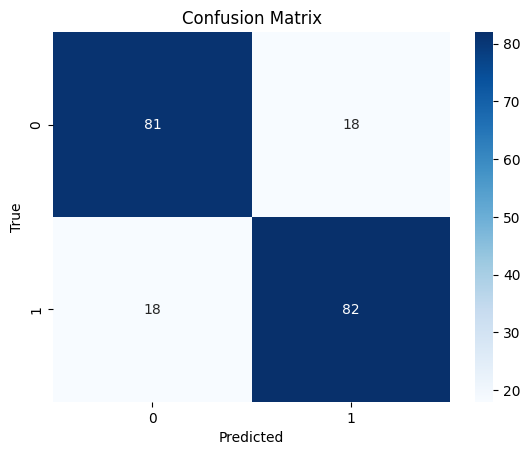

In [140]:
# Adjust the decision threshold
new_threshold = 0.55  # You can adjust this value
adjusted_predictions = (stack_model.predict_proba(X_test)[:, 1] >= new_threshold).astype(int)

# Calculate the new confusion matrix and metrics
new_cm = confusion_matrix(Y_test, adjusted_predictions)
new_TP = new_cm[0, 0]
new_FN = new_cm[0, 1]
new_FP = new_cm[1, 0]
new_TN = new_cm[1, 1]

new_precision = new_TP / (new_TP + new_FP)
new_sensitivity = new_TP / (new_TP + new_FN)
new_specificity = new_TN / (new_TN + new_FP)
new_f1_score = 2 * new_TP / (2 * new_TP + new_FP + new_FN)

print('----------------------------------')
print('Adjusted Confusion Matrix:')
print(new_cm)
print('----------------------------------')
print('Adjusted Precision:', new_precision)
print('Adjusted Sensitivity (Recall):', new_sensitivity)
print('Adjusted Specificity:', new_specificity)
print('Adjusted F1-Score:', new_f1_score)

# Plot the confusion matrix using seaborn
classes = np.unique(true_labels)
sns.heatmap(new_cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
